In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from andi_datasets.models_phenom import models_phenom
from andi_datasets.utils_challenge import label_continuous_to_list
from matplotlib import rcParams

from src.datasets import AndiDataset

plt.rcParams['figure.constrained_layout.use'] = False
sns.set_style('whitegrid')

c:\Users\Manik\miniconda3\envs\masters\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_creator = AndiDataset()

In [25]:
# set font family to Lato-Regular
rcParams['font.family'] = "Lato"
rcParams['font.sans-serif'] = "Lato"

In [26]:
T = 150

single_state = dataset_creator.single_state(6, T, 1.5, 1)[0]
muli_state = dataset_creator.multi_state(6, T, [1.5, 0.6], [[1, 0.5], [2, 0.5]])[0]
confinment = dataset_creator.confinemnet(10, T, [1.5, 0.6], [[1, 0.5], [2, 0.5]])[0]
immobile = dataset_creator.immobile(10, T, 1.5, 1)[0]
dimmerization = dataset_creator.dimmerization(20, T, [1.5, 0.6], [[1, 0.5], [2, 0.5]])[0]

all_data = [single_state, muli_state, confinment, immobile, dimmerization]
labels = ['Single State', 'Multi State', 'Confinment', 'Immobile', 'Dimmerization']

In [27]:
all_lines_styles = ['-', '--', '-.', ':', '-']
all_colors = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"]

In [28]:
def plot_trajectories(ax, trajs):
    for i in range(trajs.shape[1]):
        ax.plot(trajs[:, i, 0], trajs[:, i, 1], 
                linewidth=1.5, 
                linestyle=np.random.choice(all_lines_styles), 
                c=np.random.choice(all_colors))

C:\Windows\Temp\ipykernel_3088\2358243356.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


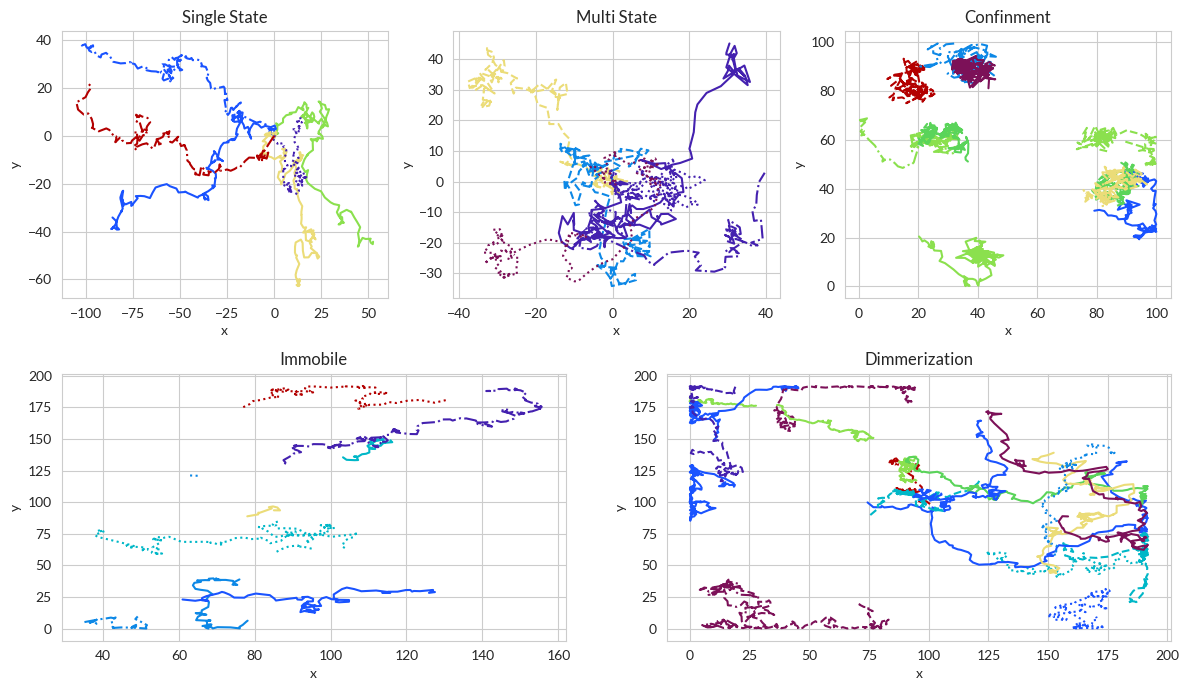

In [29]:
fig = plt.figure(figsize=(12, 7), layout="constrained")

gs0 = fig.add_gridspec(2, 1)

gs1 = gs0[0].subgridspec(1, 3)
gs2 = gs0[1].subgridspec(1, 2, hspace=5.5)


for i in range(3):
    ax = fig.add_subplot(gs1[i])
    plot_trajectories(ax, all_data[i])
    ax.set_title(labels[i])
    ax.set_xlabel("x")
    ax.set_ylabel("y")

for i in range(2):
    ax = fig.add_subplot(gs2[i])
    plot_trajectories(ax, all_data[i + 3])
    ax.set_title(labels[i + 3])
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()
plt.savefig("../figures/data_showcase.pdf")
plt.show()

### Change points

In [37]:
ps = [0.01, 0.05, 0.2]

def plot_change_points(ax, traj, labels, p):
    changepoints = label_continuous_to_list(labels[:, 0, :])[0]
    x, y = traj[:, 0, 0], traj[:, 0, 1]
    xs = np.arange(len(x))
    ax.plot(xs, x, label='x', linestyle='--')
    ax.plot(xs, y, label='y', linestyle='-')
    for i in range(len(changepoints)):
        ax.axvline(changepoints[i], c='red', linestyle='--')
    ax.set_title("Number of Change Points: " + str(len(changepoints)) + " $(p=" + str(p) + ")$")

In [38]:
trajectories_and_labels = [models_phenom().multi_state(1, 150, M=[[1-ps[i], ps[i]], [ps[i], 1-ps[i]]], alphas=[[1.7, 0.], [2.5, 0.1]]) for i in range(3)]

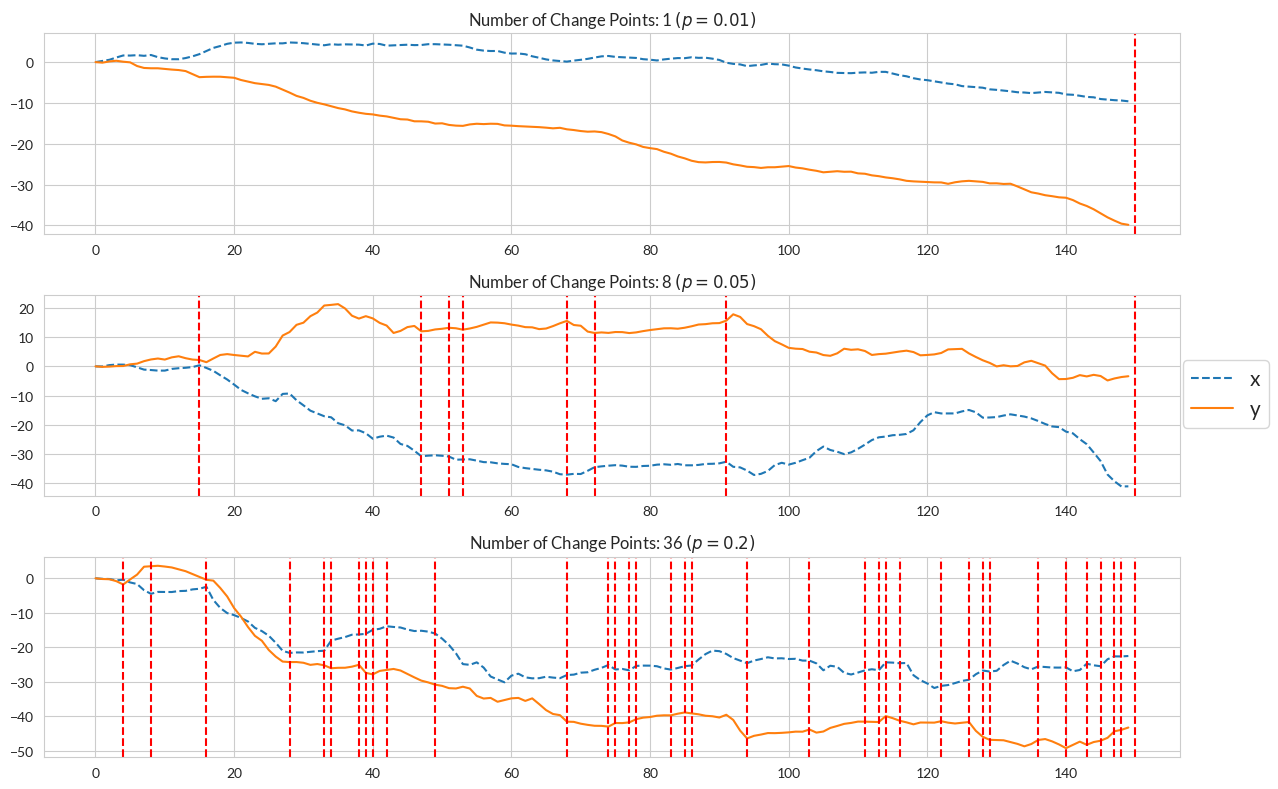

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

for i, (traj, labels) in enumerate(trajectories_and_labels):
    plot_change_points(axes[i], traj, labels, ps[i])

plt.tight_layout()
# get the legend from each plot and combine them
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='right', bbox_to_anchor=(1.07, 0.5), fontsize=15)
plt.savefig("../figures/change_points.pdf")
plt.show()